In [47]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
!rm \#*

In [48]:
import nglview as nv

In [4]:
import MDAnalysis as mda
import nglview as nv
MD=mda.Universe('init_solv_ions.pdb','prod.xtc')
sel=MD.select_atoms('all')
a=nv.show_mdanalysis(sel,gui=False)
#a.add_representation(selection='ion',repr_type='spacefill',opacity=0.9)
#a.add_representation(selection='water',repr_type='spacefill',opacity=0.1)
a

NGLWidget(max_frame=100)

Last Frame read : 500, time : 1000.0 ps
500 frame read in 0.12 seconds


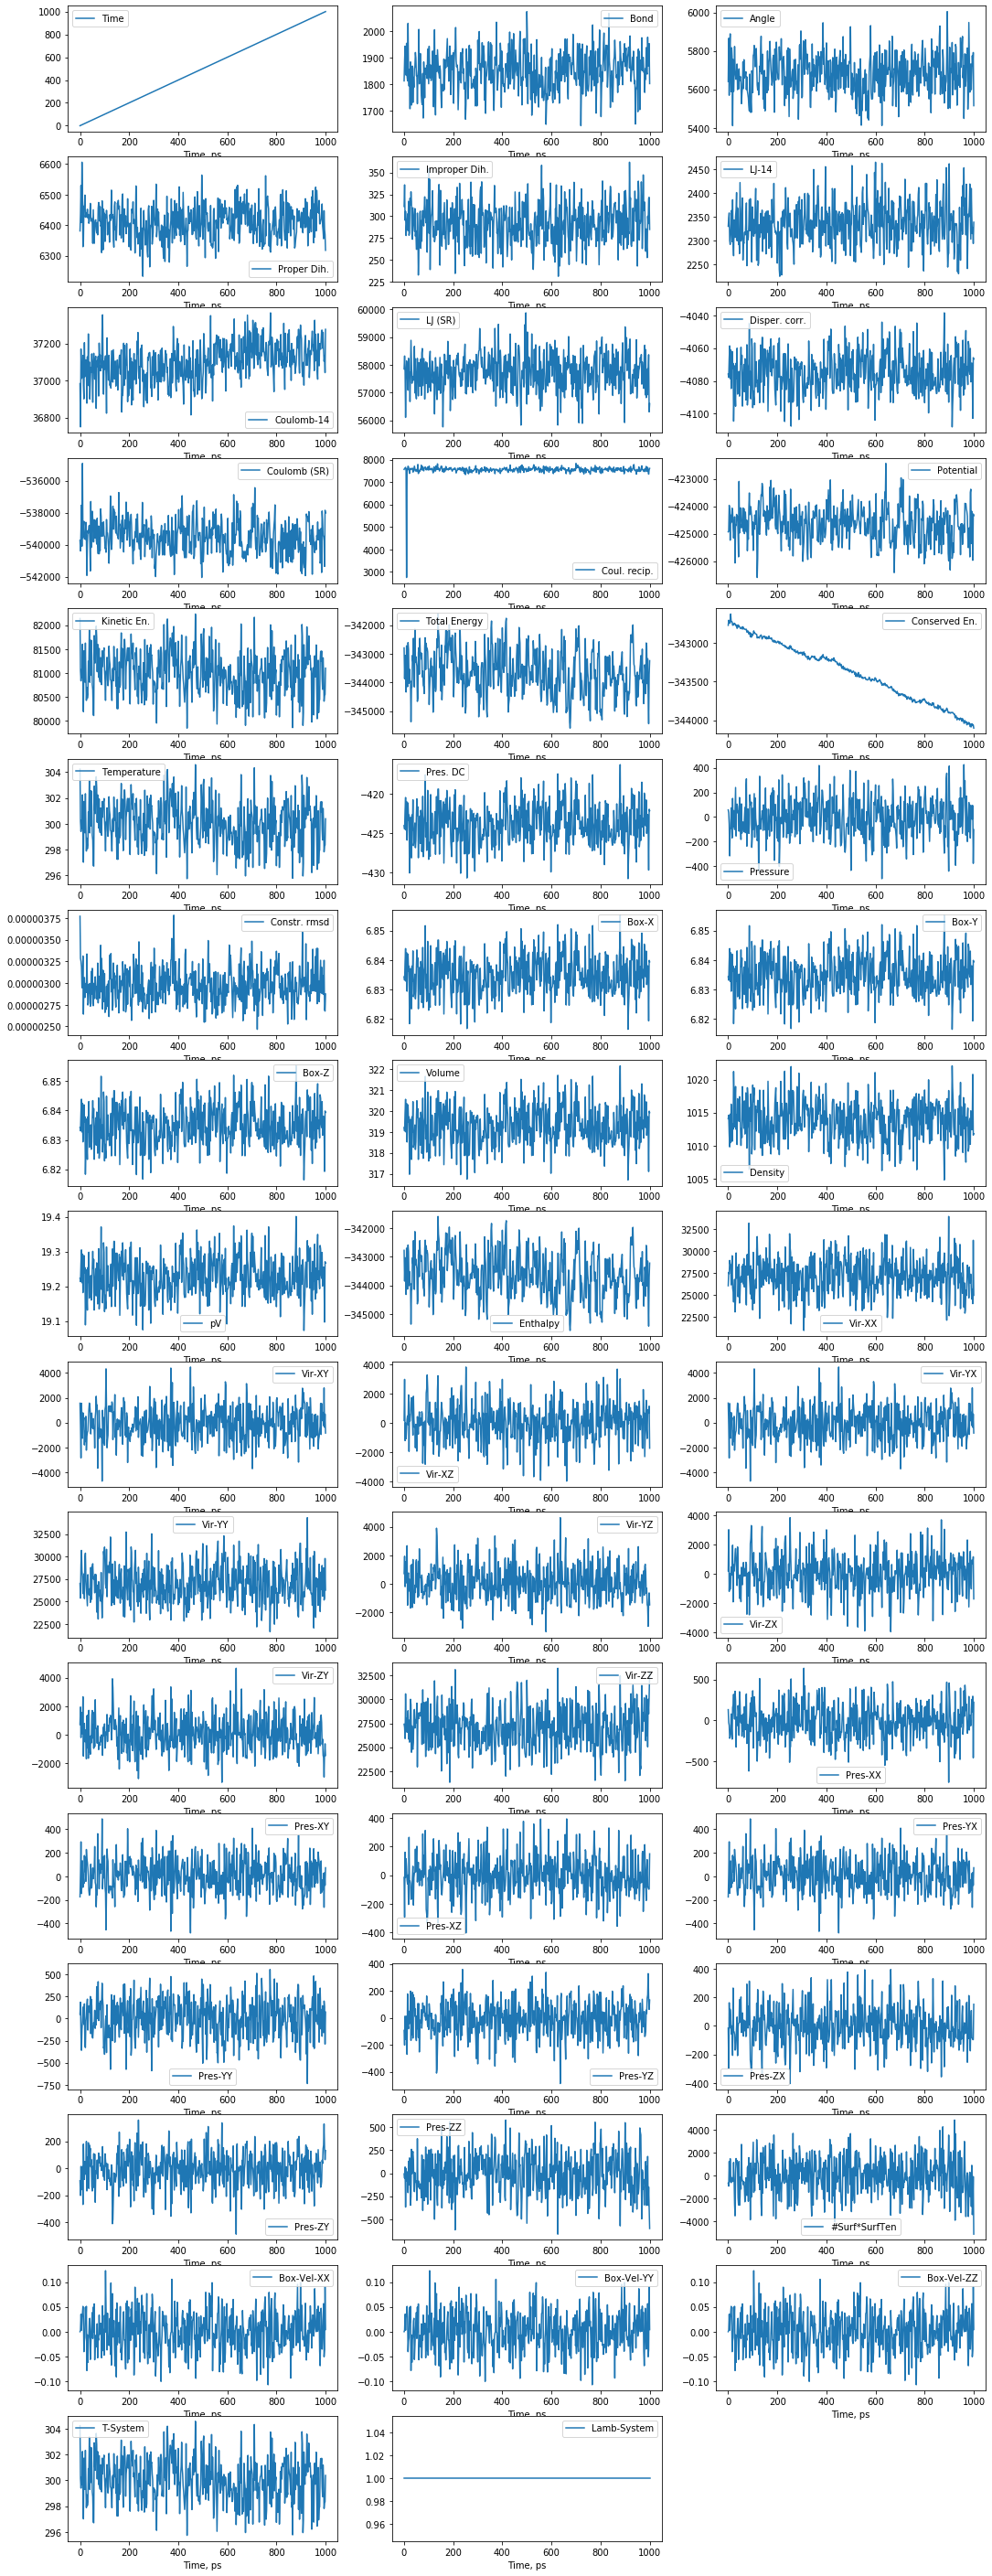

In [5]:
import panedr
import matplotlib.pyplot as plt
df = panedr.edr_to_df('prod.edr', verbose=True)
num_of_keys=len(df.keys())
grid=[1+num_of_keys//3,3]

plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.plot(df[key][0:1000],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()

### Example of proper analysis of average, fluctuations and uncetainties of fluctuating system parameters.
- We will use system density as an example.

Last Frame read : 500, time : 1000.0 ps
500 frame read in 0.11 seconds


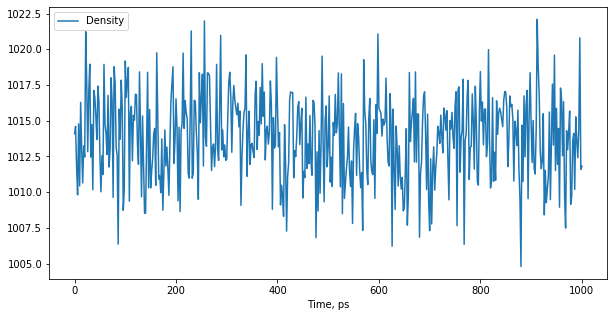

In [5]:
import panedr
import matplotlib.pyplot as plt
df = panedr.edr_to_df('prod.edr', verbose=True)
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(df['Density'],label='Density')
ax.set_xlabel('Time, ps')
ax.legend()    
plt.show()

In [6]:
df['Density']

0.0       1014.079346
2.0       1014.600098
4.0       1011.754761
6.0       1009.806885
8.0       1014.770935
             ...     
992.0     1012.403381
994.0     1014.333191
996.0     1020.795471
998.0     1011.591248
1000.0    1011.811157
Name: Density, Length: 501, dtype: float64

Last Frame read : 500, time : 1000.0 ps
500 frame read in 0.13 seconds


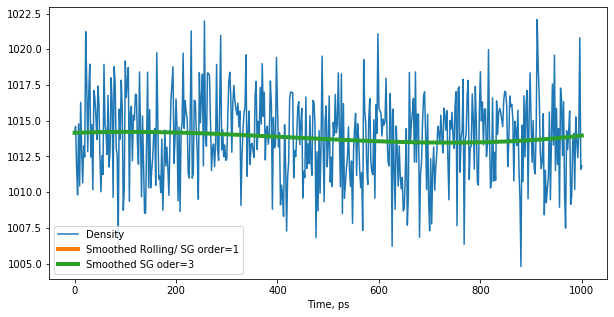

In [7]:
from scipy.signal import savgol_filter
import panedr
import matplotlib.pyplot as plt
df = panedr.edr_to_df('prod.edr', verbose=True)
#df=df[0:10]
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(df['Density'],label='Density')

yroll = df['Density'].rolling(501,center=True).mean()
#print(yroll)
ax.plot(df.index,yroll,label='Smoothed Rolling/ SG order=1',linewidth=4)


ysg3 = savgol_filter(df['Density'], 501, 3)
ax.plot(df.index,ysg3,label='Smoothed SG oder=3',linewidth=4)
ax.set_xlabel('Time, ps')
ax.legend()    
plt.show()


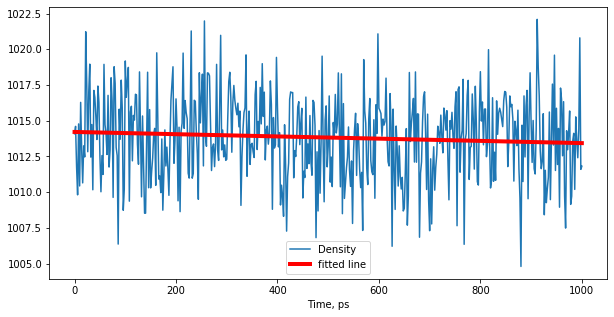

In [8]:
from scipy import stats
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(df['Density'],label='Density')
res = stats.linregress(df.index, df['Density'])
ax.plot(df.index, res.intercept + res.slope*df.index, 'r', label='fitted line',linewidth=4)
ax.set_xlabel('Time, ps')
ax.legend()    
plt.show()

### Calculate autocorrelation

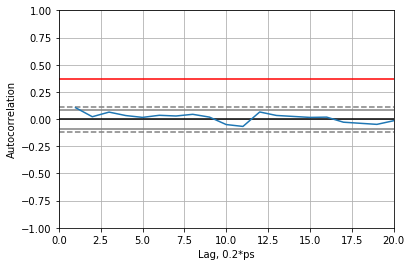

In [9]:
import pandas as pd
ax=pd.plotting.autocorrelation_plot(df['Density'])
ax.set_xlim(0,20)
ax.set_xlabel("Lag, 2*ps")
ax.axhline(1/2.718,color='r')

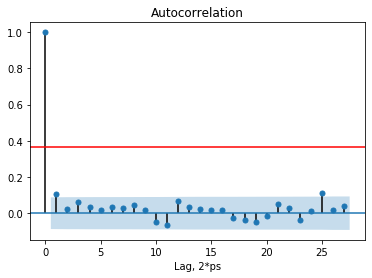

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
fig=plot_acf(df['Density'])
ax=plt.gca()
ax.set_xlabel("Lag, 2*ps")
ax.axhline(1/2.718,color='r')

### Check distibution normality

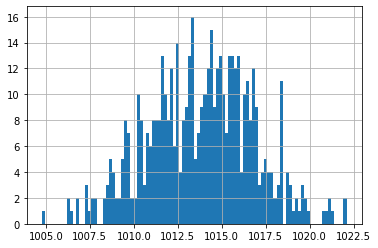

In [11]:
df['Density'].hist(bins=100)

((array([-2.99270804, -2.71082138, -2.55232103, -2.4399352 , -2.35187589,
         -2.27898232, -2.21650076, -2.16163482, -2.11259502, -2.06816452,
         -2.0274769 , -1.98989254, -1.95492533, -1.92219684, -1.89140648,
         -1.86231137, -1.83471234, -1.80844395, -1.78336724, -1.7593643 ,
         -1.73633419, -1.71418981, -1.69285547, -1.67226493, -1.65235992,
         -1.63308885, -1.61440587, -1.59626998, -1.57864442, -1.56149607,
         -1.54479499, -1.528514  , -1.51262839, -1.49711557, -1.48195489,
         -1.46712738, -1.45261558, -1.4384034 , -1.42447597, -1.41081949,
         -1.39742117, -1.38426912, -1.37135225, -1.35866021, -1.34618334,
         -1.33391259, -1.32183946, -1.30995599, -1.29825468, -1.28672848,
         -1.27537073, -1.26417516, -1.25313584, -1.24224716, -1.23150381,
         -1.22090074, -1.21043319, -1.20009661, -1.18988669, -1.17979932,
         -1.16983059, -1.15997678, -1.15023433, -1.14059985, -1.13107009,
         -1.12164197, -1.1123125 , -1.

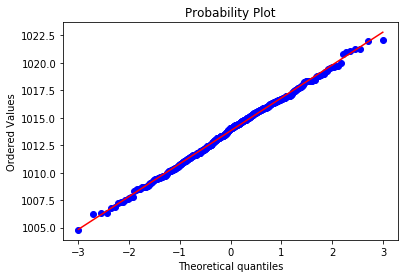

In [12]:
import scipy.stats as stats
stats.probplot(df['Density'], dist="norm",plot=plt)

In [22]:
df['Density'][50:]

50.0      1012.523560
52.0      1010.021790
54.0      1012.553772
56.0      1011.234558
58.0      1018.939392
             ...     
992.0     1012.403381
994.0     1014.333191
996.0     1020.795471
998.0     1011.591248
1000.0    1011.811157
Name: Density, Length: 476, dtype: float64

In [13]:
from scipy.stats import shapiro
stat, p = shapiro(df['Density'][::2])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.993, p=0.324
Sample looks Gaussian (fail to reject H0)


### Estimate average and dispersion

In [15]:
df['Density'].mean()

1013.8181091430421

In [16]:
df['Density'].std()

2.9882602042697606

### Standard error of mean

In [17]:
df['Density'][:].sem()

0.13350562009014225

In [34]:
df['Density'][::].std()/(1000/2)**0.5

0.13363905902409184

### Calcuate RMSD and gyration radius of the protein with time

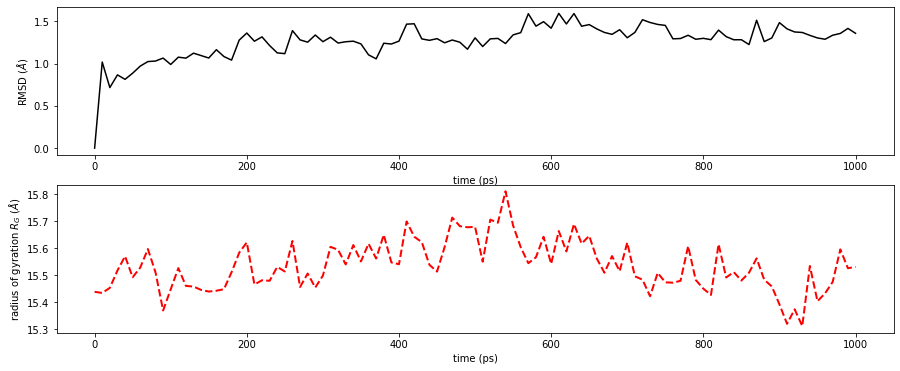

In [18]:
#MDAnalysis
import MDAnalysis.analysis.pca as pca
import MDAnalysis.analysis.encore as encore
from MDAnalysis.analysis.rms import RMSF
import MDAnalysis as mda
import numpy as np

trj=mda.Universe('equil2.gro', 'prod.xtc')
ref = mda.Universe('equil2.gro')
R = mda.analysis.rms.RMSD(trj, ref, select="protein and backbone",filename="rmsd.dat")
R.run()

rmsd = R.rmsd.T   # transpose makes it easier for plotting


prot = trj.select_atoms("protein or nucleic")
Rgyr=[]
for ts in trj.trajectory[::1]:
   Rgyr.append((trj.trajectory.time, prot.radius_of_gyration()))
Rgyr = np.array(Rgyr)

plt.figure(figsize=(15,6))
ax = plt.subplot(211)
ax.plot(Rgyr[:,0], rmsd[2], 'k-',  label="backbone")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"RMSD ($\AA$)")

ax2 = plt.subplot(212)
ax2.plot(Rgyr[:,0],Rgyr[:,1], 'r--', lw=2, label=r"$R_G$")
ax2.set_xlabel("time (ps)")
ax2.set_ylabel(r"radius of gyration $R_G$ ($\AA$)")

plt.draw()

#### Advanced options: plot RMSD matrix, plot RMSF along the sequence, plot heatplot of RMSD versus time.

### Calcuate distance between N- and C-ends of the protein

In [19]:
import MDAnalysis.analysis.pca as pca
import MDAnalysis.analysis.encore as encore
from MDAnalysis.analysis.rms import RMSF
import MDAnalysis as mda
import numpy as np

trj=mda.Universe('equil2.gro', 'prod.xtc')

prot = trj.select_atoms("protein")


In [20]:
prot.resids

array([  1,   1,   1, ..., 153, 153, 153])

In [22]:
start=trj.select_atoms('protein and resid %s'%prot.resids[0])
end=trj.select_atoms('protein and resid %s'%prot.resids[-1])

start.center_of_mass()

array([15.0989508 , 26.93264327, 38.01650691])

In [133]:
np.linalg.norm(start.center_of_mass()-end.center_of_mass())

24.53961236108947

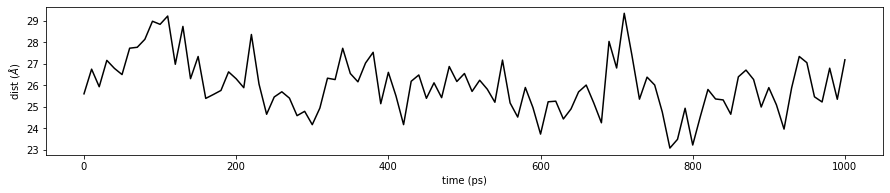

In [23]:
dist=[]
for ts in trj.trajectory[::1]:
    dist.append(np.linalg.norm(start.center_of_mass()-end.center_of_mass()))
dist = np.array(dist)

plt.figure(figsize=(15,6))
ax = plt.subplot(211)
ax.plot(Rgyr[:,0], dist, 'k-',  label="backbone")
ax.set_xlabel("time (ps)")
ax.set_ylabel(r"dist ($\AA$)")

plt.draw()

### Calcualte the number of hydrogen bonds within your protein and with water

In [ ]:
Homework, use https://docs.mdanalysis.org/stable/documentation_pages/analysis/hydrogenbonds.html 
Or your own code

In [ ]:
from MDAnalysis.analysis.hbonds import HydrogenBondAnalysis

h = HydrogenBondAnalysis(.....)
h.run()

In [ ]:
h.generate_table()
df=pd.DataFrame(h.table)
...............

### Calculate radial distribution function between water molecules

In [24]:
wat=trj.select_atoms('name OW')

In [27]:
wat.names.shape

(9774,)

In [28]:
import MDAnalysis.analysis.rdf
rdf = MDAnalysis.analysis.rdf.InterRDF(wat,wat)

In [29]:
rdf.run(start=0, stop=2)

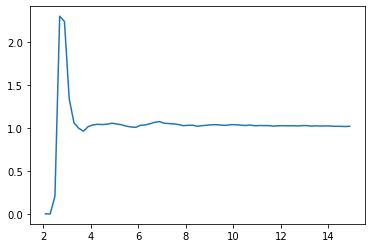

In [30]:
plt.plot(rdf.bins[10:],rdf.rdf[10:])

### Estimate water diffusion coefficients from displacement 
https://docs.mdanalysis.org/dev/documentation_pages/analysis/msd.html

In [31]:
wat=trj.select_atoms('name OW')

In [33]:
wat.positions.shape

(9774, 3)

In [38]:
msd=[]
cr=wat.positions
for ts in trj.trajectory[1:20:1]:
    c=wat.positions
    d=c-cr
    msd.append((d[:,0]**2+d[:,1]**2+d[:,2]**2).mean())
#print(msd)

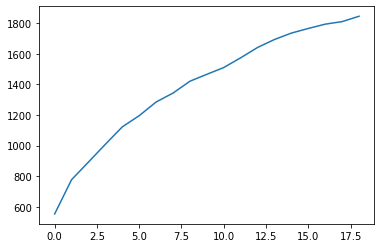

In [39]:
plt.plot(msd)

In [43]:
len(range(2,39,2))

19

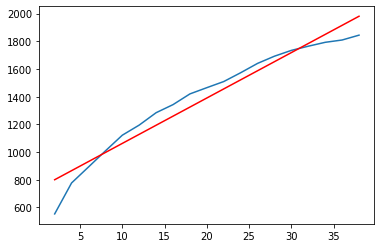

In [45]:
res = stats.linregress( range(2,39,2), msd)
plt.plot(range(2,39,2), msd)
plt.plot(range(2,39,2), res.intercept + res.slope*range(2,39,2), 'r')
plt.show()

In [46]:
res.slope/6*10**(-16)*10**(12)*10**5

54.66149375870909

1400*10**(-16)/6/(18*10**(-12))*10**5

In [47]:
import MDAnalysis.analysis.msd as msd
MSD = msd.EinsteinMSD(trj, select='name OW', msd_type='xyz', fft=True)
MSD.run()

ModuleNotFoundError: No module named 'MDAnalysis.analysis.msd'

In [ ]:
msd =  MSD.timeseries

In [ ]:
import matplotlib.pyplot as plt
nframes = MSD.n_frames
timestep = 1 # this needs to be the actual time between frames
lagtimes = np.arange(nframes)*timestep # make the lag-time axis
fig = plt.figure()
ax = plt.axes()
# plot the actual MSD
ax.plot(lagtimes, msd, lc="black", ls="-", label=r'3D random walk')
exact = lagtimes*6

plt.show()

### Calculate the isochoric heat capacity of the system from energy fluctuations

In [ ]:
This will be homework.

In [52]:
df.columns

Index(['Time', 'Bond', 'Angle', 'Proper Dih.', 'Improper Dih.', 'LJ-14',
       'Coulomb-14', 'LJ (SR)', 'Disper. corr.', 'Coulomb (SR)',
       'Coul. recip.', 'Potential', 'Kinetic En.', 'Total Energy',
       'Conserved En.', 'Temperature', 'Pres. DC', 'Pressure', 'Constr. rmsd',
       'Box-X', 'Box-Y', 'Box-Z', 'Volume', 'Density', 'pV', 'Enthalpy',
       'Vir-XX', 'Vir-XY', 'Vir-XZ', 'Vir-YX', 'Vir-YY', 'Vir-YZ', 'Vir-ZX',
       'Vir-ZY', 'Vir-ZZ', 'Pres-XX', 'Pres-XY', 'Pres-XZ', 'Pres-YX',
       'Pres-YY', 'Pres-YZ', 'Pres-ZX', 'Pres-ZY', 'Pres-ZZ', '#Surf*SurfTen',
       'Box-Vel-XX', 'Box-Vel-YY', 'Box-Vel-ZZ', 'T-System', 'Lamb-System'],
      dtype='object')

Last Frame read : 500, time : 1000.0 ps
500 frame read in 0.13 seconds


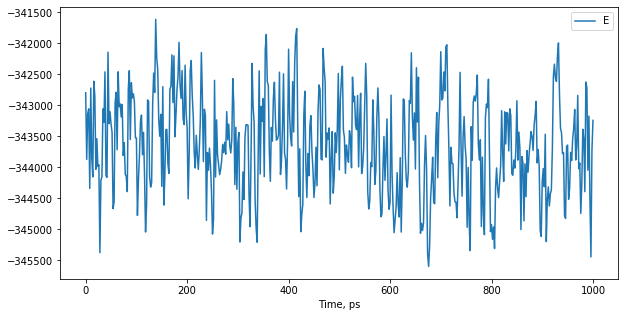

In [53]:
import panedr
import matplotlib.pyplot as plt
df = panedr.edr_to_df('prod.edr', verbose=True)
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(df['Total Energy'],label='E')
ax.set_xlabel('Time, ps')
ax.legend()    
plt.show()

In [54]:
df['Total Energy'].var()*1000


608107.9867356225

In [57]:
from scipy.constants import k

In [58]:
k

1.38064852e-23

In [60]:
1/k/(300**2)*df['Potential'].var()*1000 # J/mol

3.3315320109938666e+26

# Cluster analysis

In [300]:
nv.show_mdanalysis(mda.Universe('init_solv_ions.pdb','prod.xtc').select_atoms('protein'))

NGLWidget(max_frame=100)

1. Построим матрицу RMSD кадров друг с другом 

In [323]:
%%bash 
module load gromacs/2020.1_nompi
gmx rms  -s prod.tpr -f prod.xtc -f2 prod.xtc -m d/rmsd-matrix.xpm -o rmsd.xvg -tu ns -nlevels 40 -min 0 <<!
Protein
Protein
!


Selected 1: 'Protein'
Selected 1: 'Protein'


(Un)Loading module for modern CPU
                       :-) GROMACS - gmx rms, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                         

In [199]:
! cp /home/a_kniazeva/_projects/gmx_template/xpm_plot.py .
import xpm_plot
! cp /home/a_kniazeva/_projects/gmx_template/xvg_plot.py .
import xvg_plot

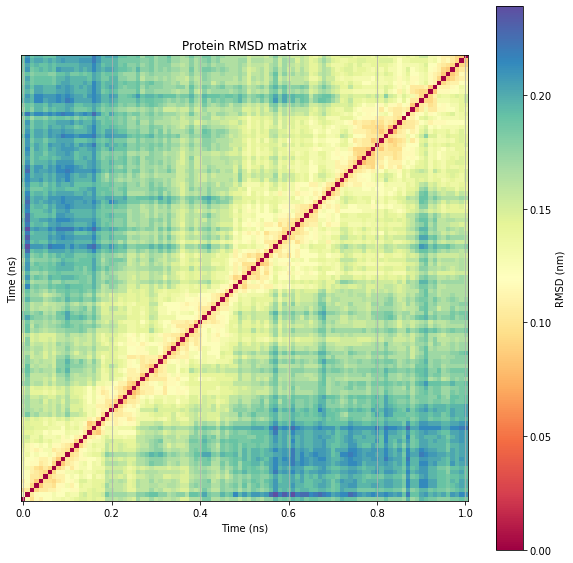

In [326]:
metadata, data = xpm_plot.parse_xpm('d/rmsd-matrix.xpm')
xpm_plot.plot_data(data, metadata)


2. Проведем кластерный анализ 

Можно регулировать параметры, например cut-off (его увеличение уменьшает число кластеров; если слишком большой и разделение проихойти не может, выйдет ошибка), метод кластеризации, минимальное число кадров в кластере и др. (см. документацию https://manual.gromacs.org/documentation/current/onlinehelp/gmx-rms.html )

на выходе получим:
- файл с кластерами-структурами, который можно посмотреть с помощью nglview
- файл-матрицу расстояний между кадрами (идентична матрице выше, но в диагональном виде) + кластеров кадров 
- файл .xvg - временной ряд, показывающий координату структуры (отнесение к кластеру) во времени 

In [334]:
%%bash 
# --out out  --err err
module load gromacs/2020.1_nompi
gmx cluster  -tu ns  -s prod.tpr -f prod.xtc -dist rms-distribution.xvg -o clusters.xpm -sz cluster-sizes.xvg -tr cluster-transitions.xpm -ntr cluster-transitions.xvg -g cluster.log -clid cluster-id-over-time.xvg -cl clusters.pdb -cutoff 0.16 -method gromos <<!
Protein
Protein
!

Selected 1: 'Protein'
Selected 1: 'Protein'


(Un)Loading module for modern CPU
                     :-) GROMACS - gmx cluster, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

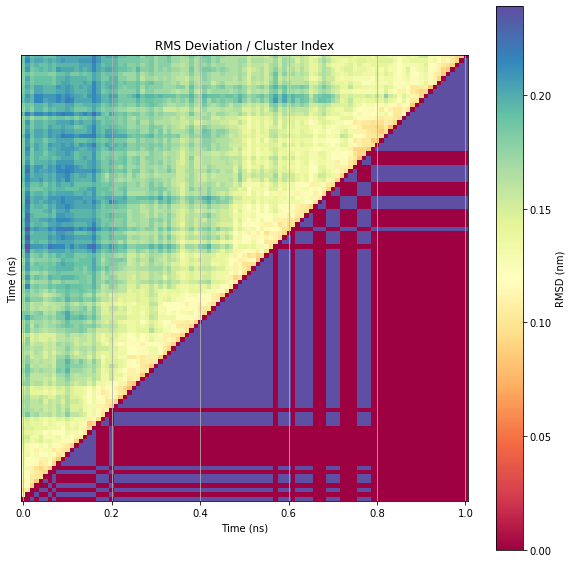

In [332]:
metadata, data = xpm_plot.parse_xpm('clusters.xpm')
xpm_plot.plot_data(data, metadata)



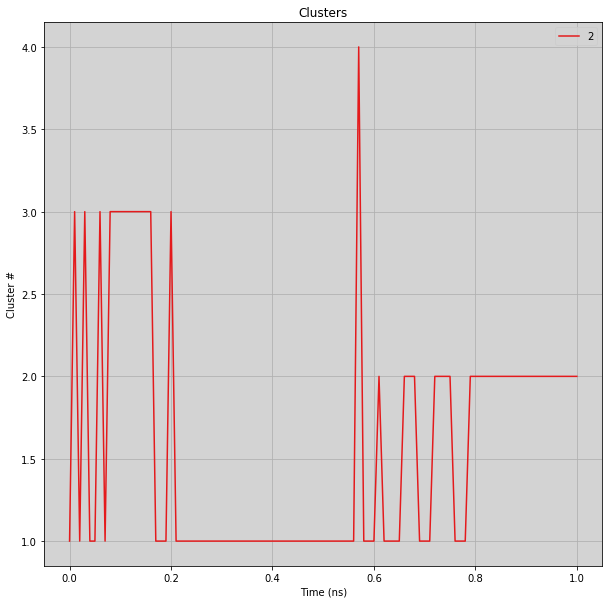

In [333]:
metadata, data = xvg_plot.parse_xvg('cluster-id-over-time.xvg', 'all')
xvg_plot.plot_data(data, metadata)

In [359]:
nv.show_mdanalysis(mda.Universe('clusters.pdb'))

NGLWidget(max_frame=2)

# PCA (principal component analysis)

In [338]:
%%bash 
module load gromacs/2020.1_nompi
gmx covar  -s prod.tpr -f prod.xtc -o eigenval.xvg -v eigenvect.trr -xpma covara.xpm -av average.pdb -l covar.log <<!
MainChain+H
MainChain+H
!


Choose a group for the least squares fit
Selected 7: 'MainChain+H'

Choose a group for the covariance analysis
Selected 7: 'MainChain+H'


(Un)Loading module for modern CPU
                      :-) GROMACS - gmx covar, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                        

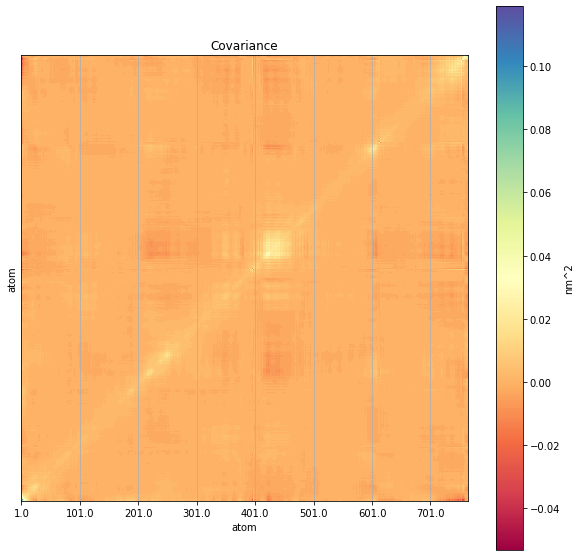

In [339]:
metadata, data = xpm_plot.parse_xpm('covara.xpm')
xpm_plot.plot_data(data, metadata)

No handles with labels found to put in legend.


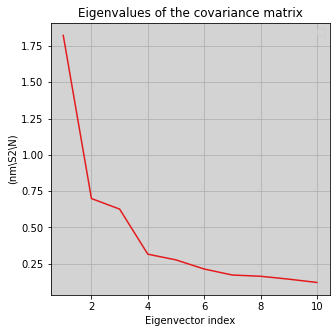

In [341]:
metadata, data = xvg_plot.parse_xvg('eigenval.xvg', 'all')
data=np.array(data)
s = data[1,:].sum()
data=data[:,0:10]
ss = data[1,:].sum()
xvg_plot.plot_data(data, metadata,figsize=(5,5))

In [342]:
ss/s # Доля объясненной дисперсии, или точность воспроизведения траектории первыми 10 векторами

0.7106581518931072

### Make implementations - визуализируем первые 10 характерных мод 

In [347]:
mda.Universe('init_solv_ions.pdb').select_atoms('protein and name C CA O N H OC2 OC1').write('sys_mainchain.pdb')

In [348]:
%%bash 
module load gromacs/2020.1_nompi
gmx anaeig -v eigenvect.trr -s prod.tpr -f prod.xtc -first 1 -last 10 -nframes 50  -extr interp.xtc<<!
MainChain+H
MainChain+H
!

for i in `seq 1 10`; do
echo $i
gmx trjconv -f interp$i.xtc -s sys_mainchain.pdb -o interp$i.xtc -fit rot+trans << !
1System
System
!
done


Select the index group that was used for the least squares fit in g_covar
Selected 7: 'MainChain+H'

Select an index group of 764 elements that corresponds to the eigenvectors
Selected 7: 'MainChain+H'

1
Note that major changes are planned in future for trjconv, to improve usability and utility.

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary.

Select group for least squares fit
Selected 1: 'Protein'
Select group for output
Selected 0: 'System'
2
Note that major changes are planned in future for trjconv, to improve usability and utility.

         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and r

(Un)Loading module for modern CPU
                      :-) GROMACS - gmx anaeig, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

In [352]:
nv.show_mdanalysis(mda.Universe('sys_mainchain.pdb', 'interp1.xtc'))

NGLWidget(max_frame=49)